<a href="https://colab.research.google.com/github/ma23m017/Time_Series/blob/main/EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this file we are going to see the code of EWMA(Exponentially Weighted Moving Average). We will use the "Airline Passengers" dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/airline_passengers.csv", index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


We will check whether any row contains null value or not

In [3]:
df.isna().sum()

Passengers    0
dtype: int64

Above we can see that there is some value given for each row, so next we are going to plot the data

<Axes: xlabel='Month'>

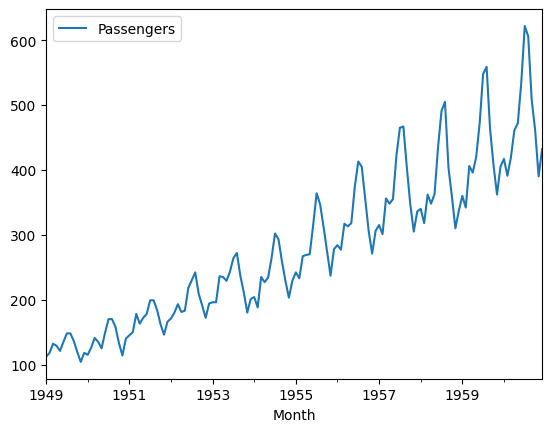

In [4]:
df.plot()

From the above graph we can say that this looks nothing like a typical stock price time series. There seems to be very little randomness in this dataset. In fact, that would meen that this wold be a hreat candidate for statistical and machine learning techinques. Machine learning is all about recognizing and modelling patterns, annd clearly there is a pettern here. On the other hand, stock price might be characterised by their lack of patterns.

We can see that with this dataset, there seems to be a trend component and the cyclical component. Trend means signal is generally going upwards, the cyclical component means that there is some peroidicity where the same pattern repeats itself. We can see that this cyclical pattern actually amplifies over time, so it's not a constatnt cyclical pattern. It is also difficult to tell whether the trend is increasing linearly or if that is also increasing over time and perhaps exponentially. In this time series we don't have enough data to see that.

In [5]:
alpha = 0.2 # choosing the value of alpha

In [8]:
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()
df.head()

,Passengers,EWMA
Month,,
1949-01-01,112,112.0000
1949-02-01,118,113.2000
1949-03-01,132,116.9600
1949-04-01,129,119.3680
1949-05-01,121,119.6944


In [9]:
type(df['Passengers'].ewm(alpha=alpha, adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

<Axes: xlabel='Month'>

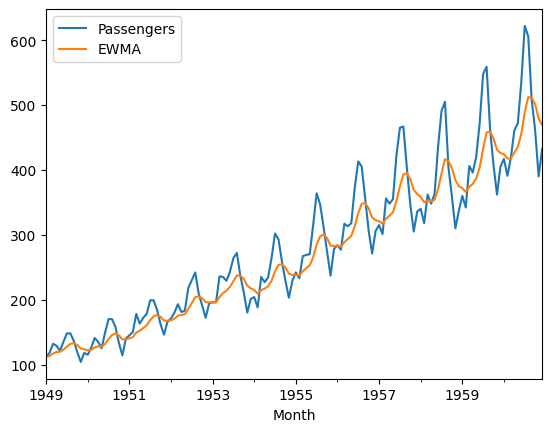

In [10]:
df.plot()

Next we try to create ewma function manually and will verify whether pandas is doing the calculation right or not.

In [12]:
manual_ewma = []
for x in df['Passengers'].to_numpy():
  if len(manual_ewma) > 0:
    xhat = alpha*x + (1-alpha)*manual_ewma[-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df['Manual'] = manual_ewma

In [13]:
df.head()

,Passengers,EWMA,Manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


<Axes: xlabel='Month'>

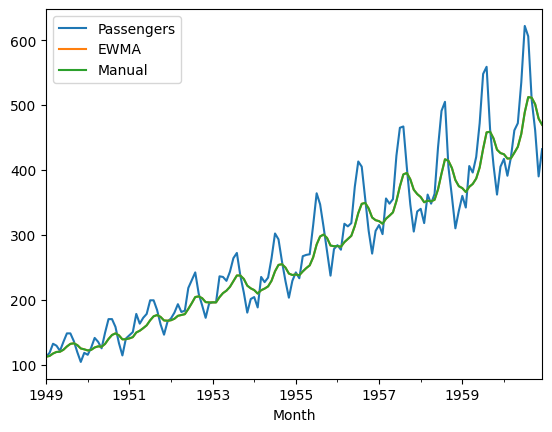

In [14]:
df.plot()